<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Madelon: 01-EDA

_Authors: Blake Cannon (DEN)_

---
MADELON is an artificial dataset, which was part of the NIPS 2003 feature selection challenge. This is a two-class classification problem with continuous input variables. The difficulty is that the problem is multivariate and highly non-linear. Among 500 attributes, only 20 are informative, the rest are noise.

### Domain and Data

You're working as a data scientist with a research firm. You're firm is bidding on a big project that will involve working with thousands or possibly tens of thousands of features. You know it will be impossible to use conventional feature selection techniques. You propose that a way to win the contract is to demonstrate a capacity to identify relevant features using machine learning. Your boss says, "Great idea. Write it up." You figure that working with a synthetic dataset such as [Madelon](https://archive.ics.uci.edu/ml/datasets/Madelon) is an excellent way to demonstrate your abilities. 

### Problem Statement

Your challenge here is to develop a series of models for two purposes:

1. for the purposes of identifying relevant features. 
2. for the purposes of generating predictions from the model.

### Notebook 1

This is the first in a series of Jupyter Notebooks and explores the Madelon dataset.

## Import packages

In [1]:
import urllib.request as urllib2

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Import Madelon Data from UCI

In [2]:
# Creating variables of the (long) URLs so as not the clutter up the code later
# Also makes it so if the URL changes I can change it in one place easily
train_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.data'
val_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_valid.data'
train_resp_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.labels'
val_resp_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/madelon_valid.labels'
test_data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_test.data'

In [3]:
# This data isn't standard csv so using numpy to load it as text
# Download the data straight from the web
X_train = np.loadtxt(urllib2.urlopen(train_data_url))
y_train = np.loadtxt(urllib2.urlopen(train_resp_url))
X_val = np.loadtxt(urllib2.urlopen(val_data_url))
y_val = np.loadtxt(urllib2.urlopen(val_resp_url))
X_test = np.loadtxt(urllib2.urlopen(test_data_url))

In [4]:
# Pickle data for use in other notebooks
np.save('./_data/X_train', X_train)
np.save('./_data/y_train', y_train)
np.save('./_data/X_val', X_val)
np.save('./_data/y_val', y_val)
np.save('./_data/X_test', X_test)

## Exploratory Data Analysis

In [5]:
# Make list of all the madelone data
madelon_data = [X_train, y_train, X_val, y_val]

In [6]:
# Make a function that prints the memory useage of a np array
def print_nbytes(li):
    for i in li:
        print(i.nbytes)  

In [7]:
print_nbytes(madelon_data)

8000000
16000
2400000
4800


In [8]:
# Make function to print data np.shapes
def print_shapes(li):
    for i in li:
        print(i.shape)

In [9]:
# Print the shapes of the madelone data
print_shapes(madelon_data)

(2000, 500)
(2000,)
(600, 500)
(600,)


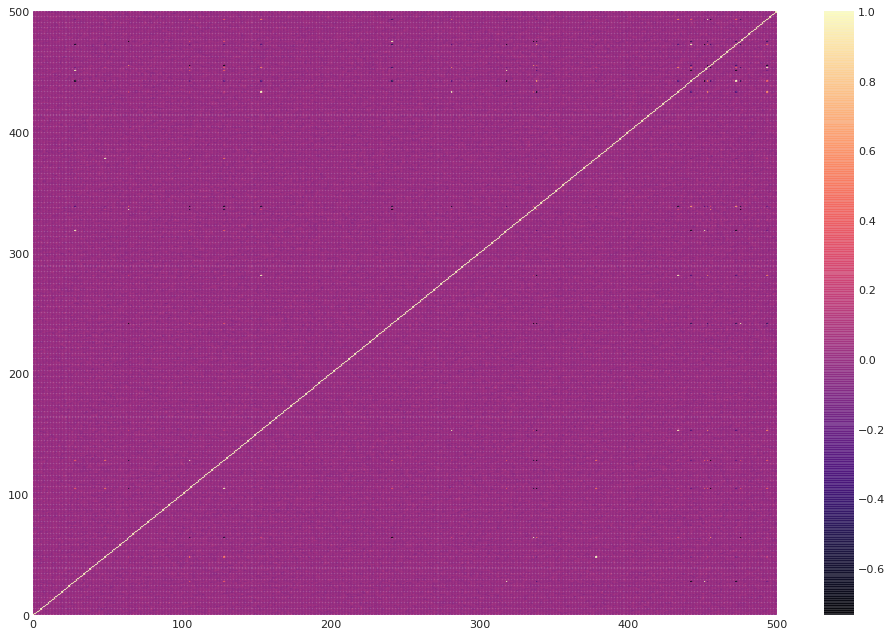

In [10]:
# Plotting Pearson product-moment correlation coefficients (np.corrcoef)
# by using a pseudo color plot of a 2D array

# Full dataset:

plt.figure(figsize=(15,10), dpi=80)
plt.pcolor(np.corrcoef(X_train, rowvar=False),
           cmap=mpl.cm.magma, 
           alpha=0.8)
plt.colorbar()
plt.savefig('./_assets/1-1-pcolor-full.png')
plt.show()

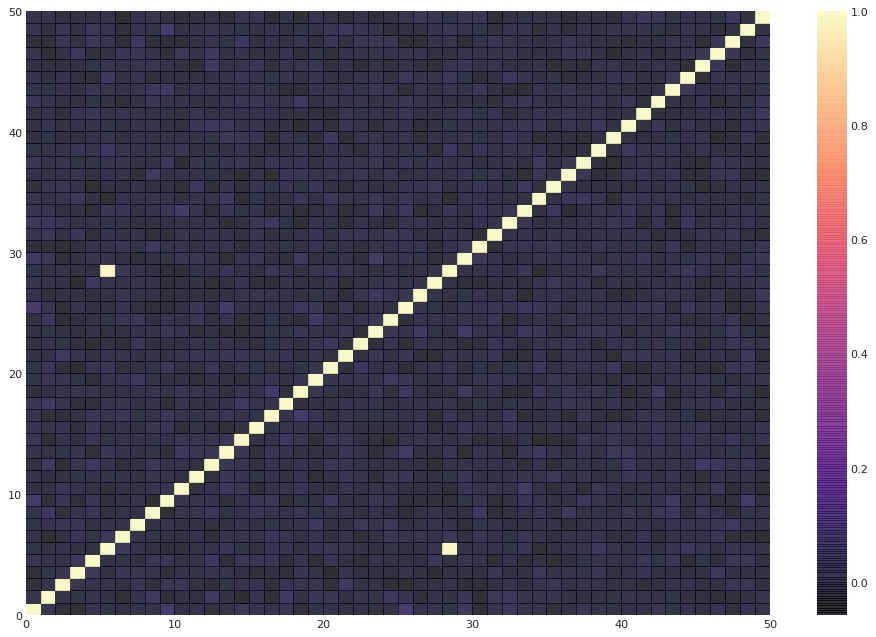

In [11]:
# Plotting Pearson product-moment correlation coefficients (np.corrcoef)
# by using a pseudo color plot of a 2D array

# Sample  dataset:

plt.figure(figsize=(15,10), dpi=80)
plt.pcolor(np.corrcoef(X_train[:,100:150], rowvar=False),
           cmap=mpl.cm.magma,
           alpha=0.8)
plt.colorbar()
plt.savefig('./_assets/1-2-pcolor-sample.png')
plt.show()